In [1]:
import torchvision
from torchvision import transforms

In [2]:
mnist_data_train = torchvision.datasets.MNIST(
    "./data", train=True, download=True)
mnist_data_test = torchvision.datasets.MNIST(
    "./data", train=False, download=True)
x_example, y_example = mnist_data_train[0]
type(x_example)


PIL.Image.Image

In [3]:
mnist_data_train = torchvision.datasets.MNIST(
    "data", train=True, download=True, transform=transforms.ToTensor()
)
mnist_data_test = torchvision.datasets.MNIST(
    "data", train=False, download=True, transform=transforms.ToTensor()
)
x_example, y_example = mnist_data_train[0]
print(x_example.shape)


torch.Size([1, 28, 28])


In [4]:
x_example[0, :].shape

torch.Size([28, 28])

In [5]:
import plotly.express as px

px.imshow(x_example[0, :], color_continuous_scale="gray").update_layout(
    coloraxis_showscale=False
)


In [6]:
import torch
import matplotlib.pyplot as plt

example = x_example[0, :]
x_as_color = torch.stack([example] * 3, dim=0)
print(x_as_color.shape)


torch.Size([3, 28, 28])


In [7]:
px.imshow(x_as_color.permute(1, 2, 0)).update_layout(coloraxis_showscale=False)


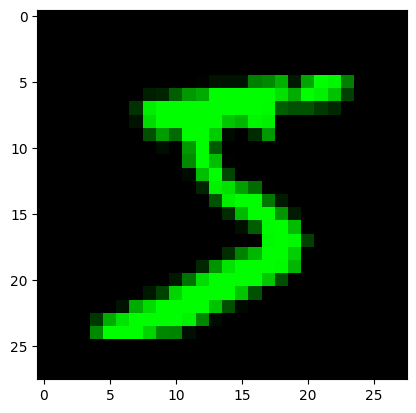

In [8]:
x_as_color = torch.stack([x_example[0, :], x_example[0, :], x_example[0, :]])
x_as_color[0, :] = 0
x_as_color[2, :] = 0
plt.imshow(x_as_color.permute(1, 2, 0))


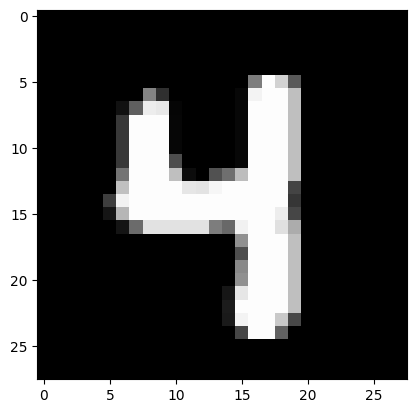

In [9]:
from scipy.signal import convolve
import numpy as np

img_indx = 58
img = mnist_data_train[img_indx][0][0, :]
plt.imshow(img, vmin=0, vmax=1, cmap="gray")
plt.show()


In [10]:
blur_filter = np.asarray(
    [
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
    ],
    dtype=np.float64,
)

blur_filter /= 9.0


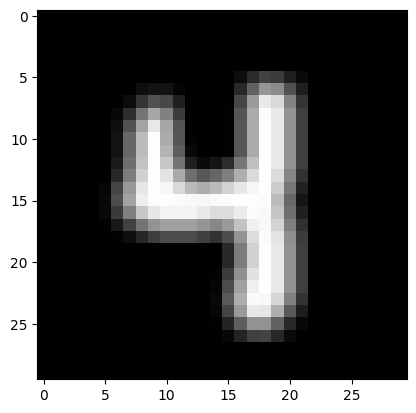

In [11]:
blurry_img = convolve(img, blur_filter)
plt.imshow(blurry_img, vmin=0, vmax=1, cmap="gray")
plt.show()


In [12]:
edge_filter = np.asarray(
    [
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1],
    ]
)

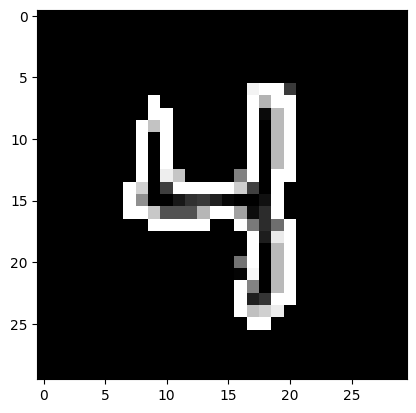

In [13]:
edge_img = convolve(img, edge_filter)
plt.imshow(edge_img, vmin=0, vmax=1, cmap="gray")
plt.show()


In [16]:
from torch.utils.data import DataLoader
from torch import nn

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

batch_size = 32
mnist_train_loader = DataLoader(
    mnist_data_train,
    batch_size=batch_size,
    shuffle=True,
)
mnist_test_loader = DataLoader(
    mnist_data_test,
    batch_size=batch_size,
)


In [18]:
D = 28 * 28
C = 1
n_classes = 10
filters = 16
K = 3  # filter size

model_linear = nn.Sequential(
    nn.Flatten(),  # (B, C, W, H) -> (B, C * W * H) = (B, D)
    nn.Linear(D, 256),
    nn.ReLU(),
    nn.Linear(256, n_classes),
)

model_cnn = nn.Sequential(
    nn.Conv2d(C, filters, K, padding=1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(filters * D, n_classes),
)

In [19]:
from idlmam import train_simple_network
from sklearn.metrics import accuracy_score

loss_func = nn.CrossEntropyLoss()
cnn_results = train_simple_network(
    model_cnn,
    loss_func=loss_func,
    train_loader=mnist_train_loader,
    test_loader=mnist_test_loader,
    score_funcs={"accuracy": accuracy_score},
    device=device,
    epochs=20,
)
fc_results = train_simple_network(
    model_linear,
    loss_func,
    mnist_train_loader,
    test_loader=mnist_test_loader,
    score_funcs={"Accuracy": accuracy_score},
    device=device,
    epochs=20,
)


Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

/home/mike/miniconda3/envs/huggin/lib/python3.10/site-packages/torch/nn/modules/conv.py:459: UserWarning:

Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)



Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

In [24]:
fc_results


,epoch,total time,train loss,test loss,train Accuracy,test Accuracy
0,0,4.532898,2.085992,1.817246,0.562833,0.7362
1,1,9.065405,1.511594,1.196585,0.759133,0.7997
2,2,13.585921,1.018415,0.838408,0.812133,0.8352
3,3,18.048851,0.766741,0.665434,0.839583,0.8562
4,4,22.537813,0.637200,0.569407,0.854700,0.8694
5,5,27.102678,0.560444,0.509506,0.865817,0.8784
6,6,31.595524,0.510032,0.468464,0.873217,0.8841
7,7,36.120888,0.474323,0.438387,0.878783,0.8883
8,8,40.718096,0.447793,0.415828,0.883100,0.8925
9,9,45.206867,0.427249,0.398331,0.886667,0.8940


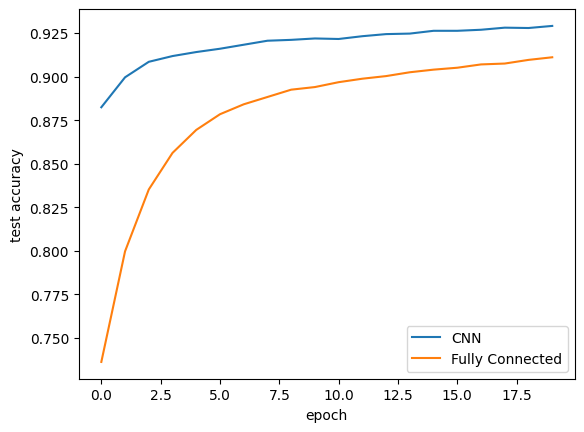

In [25]:
import seaborn as sns

sns.lineplot(x="epoch", y="test accuracy", data=cnn_results, label="CNN")
sns.lineplot(x="epoch", y="test Accuracy", data=fc_results, label="Fully Connected")
plt.show()

In [27]:
model_cnn_pool = nn.Sequential(
    nn.Conv2d(C, filters, 3, padding=3 // 2),
    nn.Tanh(),
    nn.Conv2d(filters, filters, 3, padding=3 // 2),
    nn.Tanh(),
    nn.Conv2d(filters, filters, 3, padding=3 // 2),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(filters, 2 * filters, 3, padding=3 // 2),
    nn.Tanh(),
    nn.Conv2d(2 * filters, 2 * filters, 3, padding=3 // 2),
    nn.Tanh(),
    nn.Conv2d(2 * filters, 2 * filters, 3, padding=3 // 2),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(2 * filters * D // (4**2), n_classes),
)
cnn_results_with_pool = train_simple_network(
    model_cnn_pool,
    loss_func,
    mnist_train_loader,
    test_loader=mnist_test_loader,
    score_funcs={"Accuracy": accuracy_score},
    device=device,
    epochs=20,
)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

Training:   0%|          | 0/1875 [00:00<?, ?it/s]

Testing:   0%|          | 0/313 [00:00<?, ?it/s]

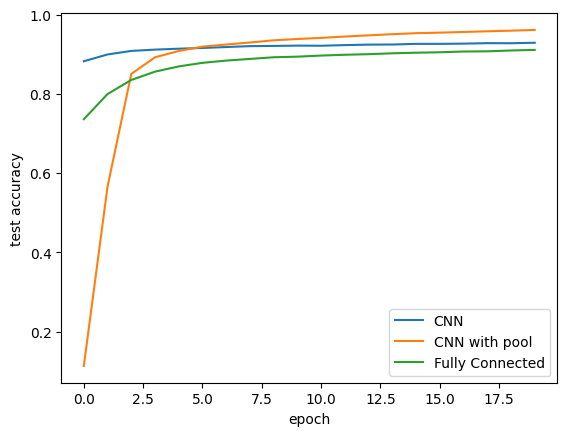

In [28]:
sns.lineplot(x="epoch", y="test accuracy", data=cnn_results, label="CNN")
sns.lineplot(
    x="epoch", y="test Accuracy", data=cnn_results_with_pool, label="CNN with pool"
)
sns.lineplot(x="epoch", y="test Accuracy", data=fc_results, label="Fully Connected")
plt.show()